In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url='https://drive.google.com/file/d/1G-kSFRvchFLS_7VP_ujloJTUmIrJeaLp/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


**Pre processing**

In [3]:
for j in df.columns:
    if df[f'{j}'].dtypes=='O':
        dit9={}
        x=0
        for i in df[f'{j}']:
            if i not in dit9:
                dit9[i]=x
                x+=1
        df[f'{j}']=df[f'{j}'].map(dit9)
df

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


In [4]:
df_r=df
df[f'{df.columns[-1]}'].value_counts()

0    896
1     41
Name: target, dtype: int64

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
X1= df_r.iloc[:,:-1]
y1=df_r.iloc[:,-1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=50)

In [6]:
df1=pd.concat([X1_train,y1_train],axis=1)
p=df1[f'{df1.columns[-1]}'].value_counts()
p

0    713
1     36
Name: target, dtype: int64

In [7]:
#Over-sampling
from sklearn.utils import resample
df_majority = df1[df1[f'{df1.columns[-1]}']==0]
df_minority = df1[df1[f'{df1.columns[-1]}']==1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,   
                                 n_samples=max(p), 
                                 random_state=123) 
df_up = pd.concat([df_majority, df_minority_upsampled])
df_up[f'{df.columns[-1]}'].value_counts()

0    713
1    713
Name: target, dtype: int64

In [8]:
df_majority = df1[df1[f'{df1.columns[-1]}']==0]
df_minority = df1[df1[f'{df1.columns[-1]}']==1]
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=min(p),
                                 random_state=123) 
df_down = pd.concat([df_majority_downsampled, df_minority])
df_down[f'{df.columns[-1]}'].value_counts()

0    36
1    36
Name: target, dtype: int64

In [9]:
X2_train= df_up.iloc[:,:-1]
y2_train=df_up.iloc[:,-1]
X3_train= df_down.iloc[:,:-1]
y3_train=df_down.iloc[:,-1]
X3_train

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49
506,12,235,64.49,1376.00,180,330468,24.61,8.95,4431.0,0.36,...,86,0.00,0.00,0.00,0.00,0.00,0,7878.88,36.05,14.90
630,62,24,44.83,587.29,176,194400,59.46,11.95,1408.0,0.20,...,67,540.00,360.00,210.00,109.00,2.57,0,4618.72,66.13,6.01
559,65,197,226.62,1558.99,122,277031,34.45,24.69,2940.0,0.72,...,86,0.00,0.00,0.00,0.00,0.00,0,7971.74,36.17,14.86
101,91,183,62.01,1648.53,117,457500,43.09,3.17,5340.0,0.07,...,55,782.62,806.23,422.74,214.05,1.85,0,29233.01,66.15,5.92
764,32,145,20.19,418.42,72,1174500,61.51,17.35,6362.0,0.28,...,50,1793.24,742.16,445.58,100.17,4.02,0,2326.02,65.89,6.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,5,57,260.19,1296.07,52,142500,40.46,4.33,2000.0,0.11,...,63,960.47,141.42,89.57,41.98,10.72,1,26361.00,65.97,6.30
186,182,114,1123.09,491.78,23,285000,34.17,9.31,2280.0,0.27,...,55,650.00,492.44,334.28,117.40,1.94,0,27250.38,65.73,7.58
128,118,96,920.20,640.12,41,240000,31.50,7.44,2370.0,0.24,...,55,851.47,282.84,184.94,84.35,4.60,0,27836.68,65.77,7.29
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,69,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95


In [10]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123)
X4_train, y4_train = sm.fit_resample(X1_train, y1_train)


from imblearn.under_sampling import TomekLinks
nt = TomekLinks()
X5_train, y5_train = nt.fit_resample(X1_train, y1_train)

from imblearn.under_sampling import NearMiss
nr = NearMiss()
X6_train, y6_train= nr.fit_resample(X1_train, y1_train)

from imblearn.under_sampling import TomekLinks
nt = TomekLinks()
X9_train, y9_train = nt.fit_resample(X4_train, y4_train)

In [11]:
from imblearn.under_sampling import TomekLinks
nt = TomekLinks()
X7_train, y7_train = nt.fit_resample(X2_train, y2_train)


from imblearn.under_sampling import NearMiss
nr = NearMiss()
X8_train, y8_train= nr.fit_resample(X2_train, y2_train)


from imblearn.under_sampling import NearMiss
nr = NearMiss()
X10_train, y10_train= nr.fit_resample(X4_train, y4_train)

In [12]:
A = []
B = []
C = []
D = []
E = []
F = []
G = []
H = []
I = []
J = []

**Decision Tree**

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()
clf4 = DecisionTreeClassifier()
clf5 = DecisionTreeClassifier()
clf6 = DecisionTreeClassifier()
clf7 = DecisionTreeClassifier()
clf8 = DecisionTreeClassifier()
clf9 = DecisionTreeClassifier()
clf10 = DecisionTreeClassifier()
clf1.fit(X1_train,y1_train)
clf2.fit(X2_train,y2_train)
clf3.fit(X3_train,y3_train)
clf4.fit(X4_train,y4_train)
clf5.fit(X5_train,y5_train)
clf6.fit(X6_train,y6_train)
clf7.fit(X7_train,y7_train)
clf8.fit(X8_train,y8_train)
clf9.fit(X9_train,y9_train)
clf10.fit(X10_train,y10_train)
y1_pred1 = clf1.predict(X1_test)
y2_pred1 = clf2.predict(X1_test)
y3_pred1 = clf3.predict(X1_test)
y4_pred1 = clf4.predict(X1_test)
y5_pred1 = clf5.predict(X1_test)
y6_pred1 = clf6.predict(X1_test)
y7_pred1 = clf7.predict(X1_test)
y8_pred1 = clf8.predict(X1_test)
y9_pred1 = clf9.predict(X1_test)
y10_pred1 = clf10.predict(X1_test)

In [14]:
A += [metrics.accuracy_score(y1_test, y1_pred1),metrics.f1_score(y1_test, y1_pred1,average='macro'),metrics.f1_score(y1_test, y1_pred1,average='micro')]
B += [metrics.accuracy_score(y1_test, y2_pred1),metrics.f1_score(y1_test, y2_pred1,average='macro'),metrics.f1_score(y1_test, y2_pred1,average='micro')]
C += [metrics.accuracy_score(y1_test, y3_pred1),metrics.f1_score(y1_test, y3_pred1,average='macro'),metrics.f1_score(y1_test, y3_pred1,average='micro')]
D += [metrics.accuracy_score(y1_test, y4_pred1),metrics.f1_score(y1_test, y4_pred1,average='macro'),metrics.f1_score(y1_test, y4_pred1,average='micro')]
E += [metrics.accuracy_score(y1_test, y5_pred1),metrics.f1_score(y1_test, y5_pred1,average='macro'),metrics.f1_score(y1_test, y5_pred1,average='micro')]
F += [metrics.accuracy_score(y1_test, y6_pred1),metrics.f1_score(y1_test, y6_pred1,average='macro'),metrics.f1_score(y1_test, y6_pred1,average='micro')]
G += [metrics.accuracy_score(y1_test, y7_pred1),metrics.f1_score(y1_test, y7_pred1,average='macro'),metrics.f1_score(y1_test, y7_pred1,average='micro')]
H += [metrics.accuracy_score(y1_test, y8_pred1),metrics.f1_score(y1_test, y8_pred1,average='macro'),metrics.f1_score(y1_test, y8_pred1,average='micro')]
I += [metrics.accuracy_score(y1_test, y9_pred1),metrics.f1_score(y1_test, y9_pred1,average='macro'),metrics.f1_score(y1_test, y9_pred1,average='micro')]
J += [metrics.accuracy_score(y1_test, y10_pred1),metrics.f1_score(y1_test, y10_pred1,average='macro'),metrics.f1_score(y1_test, y10_pred1,average='micro')]

**Naive Bayes**

In [15]:
from sklearn.naive_bayes import GaussianNB
clf1 = GaussianNB()
clf2 = GaussianNB()
clf3 = GaussianNB()
clf4 = GaussianNB()
clf5 = GaussianNB()
clf6 = GaussianNB()
clf7 = GaussianNB()
clf8 = GaussianNB()
clf9 = GaussianNB()
clf10 = GaussianNB()
clf1.fit(X1_train,y1_train)
clf2.fit(X2_train,y2_train)
clf3.fit(X3_train,y3_train)
clf4.fit(X4_train,y4_train)
clf5.fit(X5_train,y5_train)
clf6.fit(X6_train,y6_train)
clf7.fit(X7_train,y7_train)
clf8.fit(X8_train,y8_train)
clf9.fit(X9_train,y9_train)
clf10.fit(X10_train,y10_train)
y1_pred1 = clf1.predict(X1_test)
y2_pred1 = clf2.predict(X1_test)
y3_pred1 = clf3.predict(X1_test)
y4_pred1 = clf4.predict(X1_test)
y5_pred1 = clf5.predict(X1_test)
y6_pred1 = clf6.predict(X1_test)
y7_pred1 = clf7.predict(X1_test)
y8_pred1 = clf8.predict(X1_test)
y9_pred1 = clf9.predict(X1_test)
y10_pred1 = clf10.predict(X1_test)

In [16]:
A += [metrics.accuracy_score(y1_test, y1_pred1),metrics.f1_score(y1_test, y1_pred1,average='macro'),metrics.f1_score(y1_test, y1_pred1,average='micro')]
B += [metrics.accuracy_score(y1_test, y2_pred1),metrics.f1_score(y1_test, y2_pred1,average='macro'),metrics.f1_score(y1_test, y2_pred1,average='micro')]
C += [metrics.accuracy_score(y1_test, y3_pred1),metrics.f1_score(y1_test, y3_pred1,average='macro'),metrics.f1_score(y1_test, y3_pred1,average='micro')]
D += [metrics.accuracy_score(y1_test, y4_pred1),metrics.f1_score(y1_test, y4_pred1,average='macro'),metrics.f1_score(y1_test, y4_pred1,average='micro')]
E += [metrics.accuracy_score(y1_test, y5_pred1),metrics.f1_score(y1_test, y5_pred1,average='macro'),metrics.f1_score(y1_test, y5_pred1,average='micro')]
F += [metrics.accuracy_score(y1_test, y6_pred1),metrics.f1_score(y1_test, y6_pred1,average='macro'),metrics.f1_score(y1_test, y6_pred1,average='micro')]
G += [metrics.accuracy_score(y1_test, y7_pred1),metrics.f1_score(y1_test, y7_pred1,average='macro'),metrics.f1_score(y1_test, y7_pred1,average='micro')]
H += [metrics.accuracy_score(y1_test, y8_pred1),metrics.f1_score(y1_test, y8_pred1,average='macro'),metrics.f1_score(y1_test, y8_pred1,average='micro')]
I += [metrics.accuracy_score(y1_test, y9_pred1),metrics.f1_score(y1_test, y9_pred1,average='macro'),metrics.f1_score(y1_test, y9_pred1,average='micro')]
J += [metrics.accuracy_score(y1_test, y10_pred1),metrics.f1_score(y1_test, y10_pred1,average='macro'),metrics.f1_score(y1_test, y10_pred1,average='micro')]

**K-Nearest Neighbor (KNN)**

In [17]:
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier()
clf2 = KNeighborsClassifier()
clf3 = KNeighborsClassifier()
clf4 = KNeighborsClassifier()
clf5 = KNeighborsClassifier()
clf6 = KNeighborsClassifier()
clf7 = KNeighborsClassifier()
clf8 = KNeighborsClassifier()
clf9 = KNeighborsClassifier()
clf10 = KNeighborsClassifier()
clf1.fit(X1_train,y1_train)
clf2.fit(X2_train,y2_train)
clf3.fit(X3_train,y3_train)
clf4.fit(X4_train,y4_train)
clf5.fit(X5_train,y5_train)
clf6.fit(X6_train,y6_train)
clf7.fit(X7_train,y7_train)
clf8.fit(X8_train,y8_train)
clf9.fit(X9_train,y9_train)
clf10.fit(X10_train,y10_train)
y1_pred1 = clf1.predict(X1_test)
y2_pred1 = clf2.predict(X1_test)
y3_pred1 = clf3.predict(X1_test)
y4_pred1 = clf4.predict(X1_test)
y5_pred1 = clf5.predict(X1_test)
y6_pred1 = clf6.predict(X1_test)
y7_pred1 = clf7.predict(X1_test)
y8_pred1 = clf8.predict(X1_test)
y9_pred1 = clf9.predict(X1_test)
y10_pred1 = clf10.predict(X1_test)

In [18]:
A += [metrics.accuracy_score(y1_test, y1_pred1),metrics.f1_score(y1_test, y1_pred1,average='macro'),metrics.f1_score(y1_test, y1_pred1,average='micro')]
B += [metrics.accuracy_score(y1_test, y2_pred1),metrics.f1_score(y1_test, y2_pred1,average='macro'),metrics.f1_score(y1_test, y2_pred1,average='micro')]
C += [metrics.accuracy_score(y1_test, y3_pred1),metrics.f1_score(y1_test, y3_pred1,average='macro'),metrics.f1_score(y1_test, y3_pred1,average='micro')]
D += [metrics.accuracy_score(y1_test, y4_pred1),metrics.f1_score(y1_test, y4_pred1,average='macro'),metrics.f1_score(y1_test, y4_pred1,average='micro')]
E += [metrics.accuracy_score(y1_test, y5_pred1),metrics.f1_score(y1_test, y5_pred1,average='macro'),metrics.f1_score(y1_test, y5_pred1,average='micro')]
F += [metrics.accuracy_score(y1_test, y6_pred1),metrics.f1_score(y1_test, y6_pred1,average='macro'),metrics.f1_score(y1_test, y6_pred1,average='micro')]
G += [metrics.accuracy_score(y1_test, y7_pred1),metrics.f1_score(y1_test, y7_pred1,average='macro'),metrics.f1_score(y1_test, y7_pred1,average='micro')]
H += [metrics.accuracy_score(y1_test, y8_pred1),metrics.f1_score(y1_test, y8_pred1,average='macro'),metrics.f1_score(y1_test, y8_pred1,average='micro')]
I += [metrics.accuracy_score(y1_test, y9_pred1),metrics.f1_score(y1_test, y9_pred1,average='macro'),metrics.f1_score(y1_test, y9_pred1,average='micro')]
J += [metrics.accuracy_score(y1_test, y10_pred1),metrics.f1_score(y1_test, y10_pred1,average='macro'),metrics.f1_score(y1_test, y10_pred1,average='micro')]

**AdaBoost Classifier**

In [19]:
from sklearn.ensemble import AdaBoostClassifier
clf1 = AdaBoostClassifier()
clf2 = AdaBoostClassifier()
clf3 = AdaBoostClassifier()
clf4 = AdaBoostClassifier()
clf5 = AdaBoostClassifier()
clf6 = AdaBoostClassifier()
clf7 = AdaBoostClassifier()
clf8 = AdaBoostClassifier()
clf9 = AdaBoostClassifier()
clf10 = AdaBoostClassifier()
clf1.fit(X1_train,y1_train)
clf2.fit(X2_train,y2_train)
clf3.fit(X3_train,y3_train)
clf4.fit(X4_train,y4_train)
clf5.fit(X5_train,y5_train)
clf6.fit(X6_train,y6_train)
clf7.fit(X7_train,y7_train)
clf8.fit(X8_train,y8_train)
clf9.fit(X9_train,y9_train)
clf10.fit(X10_train,y10_train)
y1_pred1 = clf1.predict(X1_test)
y2_pred1 = clf2.predict(X1_test)
y3_pred1 = clf3.predict(X1_test)
y4_pred1 = clf4.predict(X1_test)
y5_pred1 = clf5.predict(X1_test)
y6_pred1 = clf6.predict(X1_test)
y7_pred1 = clf7.predict(X1_test)
y8_pred1 = clf8.predict(X1_test)
y9_pred1 = clf9.predict(X1_test)
y10_pred1 = clf10.predict(X1_test)

In [20]:
A += [metrics.accuracy_score(y1_test, y1_pred1),metrics.f1_score(y1_test, y1_pred1,average='macro'),metrics.f1_score(y1_test, y1_pred1,average='micro')]
B += [metrics.accuracy_score(y1_test, y2_pred1),metrics.f1_score(y1_test, y2_pred1,average='macro'),metrics.f1_score(y1_test, y2_pred1,average='micro')]
C += [metrics.accuracy_score(y1_test, y3_pred1),metrics.f1_score(y1_test, y3_pred1,average='macro'),metrics.f1_score(y1_test, y3_pred1,average='micro')]
D += [metrics.accuracy_score(y1_test, y4_pred1),metrics.f1_score(y1_test, y4_pred1,average='macro'),metrics.f1_score(y1_test, y4_pred1,average='micro')]
E += [metrics.accuracy_score(y1_test, y5_pred1),metrics.f1_score(y1_test, y5_pred1,average='macro'),metrics.f1_score(y1_test, y5_pred1,average='micro')]
F += [metrics.accuracy_score(y1_test, y6_pred1),metrics.f1_score(y1_test, y6_pred1,average='macro'),metrics.f1_score(y1_test, y6_pred1,average='micro')]
G += [metrics.accuracy_score(y1_test, y7_pred1),metrics.f1_score(y1_test, y7_pred1,average='macro'),metrics.f1_score(y1_test, y7_pred1,average='micro')]
H += [metrics.accuracy_score(y1_test, y8_pred1),metrics.f1_score(y1_test, y8_pred1,average='macro'),metrics.f1_score(y1_test, y8_pred1,average='micro')]
I += [metrics.accuracy_score(y1_test, y9_pred1),metrics.f1_score(y1_test, y9_pred1,average='macro'),metrics.f1_score(y1_test, y9_pred1,average='micro')]
J += [metrics.accuracy_score(y1_test, y10_pred1),metrics.f1_score(y1_test, y10_pred1,average='macro'),metrics.f1_score(y1_test, y10_pred1,average='micro')]

**Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
clf2 = LogisticRegression()
clf3 = LogisticRegression()
clf4 = LogisticRegression()
clf5 = LogisticRegression()
clf6 = LogisticRegression()
clf7 = LogisticRegression()
clf8 = LogisticRegression()
clf9 = LogisticRegression()
clf10 = LogisticRegression()
clf1.fit(X1_train,y1_train)
clf2.fit(X2_train,y2_train)
clf3.fit(X3_train,y3_train)
clf4.fit(X4_train,y4_train)
clf5.fit(X5_train,y5_train)
clf6.fit(X6_train,y6_train)
clf7.fit(X7_train,y7_train)
clf8.fit(X8_train,y8_train)
clf9.fit(X9_train,y9_train)
clf10.fit(X10_train,y10_train)
y1_pred1 = clf1.predict(X1_test)
y2_pred1 = clf2.predict(X1_test)
y3_pred1 = clf3.predict(X1_test)
y4_pred1 = clf4.predict(X1_test)
y5_pred1 = clf5.predict(X1_test)
y6_pred1 = clf6.predict(X1_test)
y7_pred1 = clf7.predict(X1_test)
y8_pred1 = clf8.predict(X1_test)
y9_pred1 = clf9.predict(X1_test)
y10_pred1 = clf10.predict(X1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [22]:
A += [metrics.accuracy_score(y1_test, y1_pred1),metrics.f1_score(y1_test, y1_pred1,average='macro'),metrics.f1_score(y1_test, y1_pred1,average='micro')]
B += [metrics.accuracy_score(y1_test, y2_pred1),metrics.f1_score(y1_test, y2_pred1,average='macro'),metrics.f1_score(y1_test, y2_pred1,average='micro')]
C += [metrics.accuracy_score(y1_test, y3_pred1),metrics.f1_score(y1_test, y3_pred1,average='macro'),metrics.f1_score(y1_test, y3_pred1,average='micro')]
D += [metrics.accuracy_score(y1_test, y4_pred1),metrics.f1_score(y1_test, y4_pred1,average='macro'),metrics.f1_score(y1_test, y4_pred1,average='micro')]
E += [metrics.accuracy_score(y1_test, y5_pred1),metrics.f1_score(y1_test, y5_pred1,average='macro'),metrics.f1_score(y1_test, y5_pred1,average='micro')]
F += [metrics.accuracy_score(y1_test, y6_pred1),metrics.f1_score(y1_test, y6_pred1,average='macro'),metrics.f1_score(y1_test, y6_pred1,average='micro')]
G += [metrics.accuracy_score(y1_test, y7_pred1),metrics.f1_score(y1_test, y7_pred1,average='macro'),metrics.f1_score(y1_test, y7_pred1,average='micro')]
H += [metrics.accuracy_score(y1_test, y8_pred1),metrics.f1_score(y1_test, y8_pred1,average='macro'),metrics.f1_score(y1_test, y8_pred1,average='micro')]
I += [metrics.accuracy_score(y1_test, y9_pred1),metrics.f1_score(y1_test, y9_pred1,average='macro'),metrics.f1_score(y1_test, y9_pred1,average='micro')]
J += [metrics.accuracy_score(y1_test, y10_pred1),metrics.f1_score(y1_test, y10_pred1,average='macro'),metrics.f1_score(y1_test, y10_pred1,average='micro')]

**Graph**

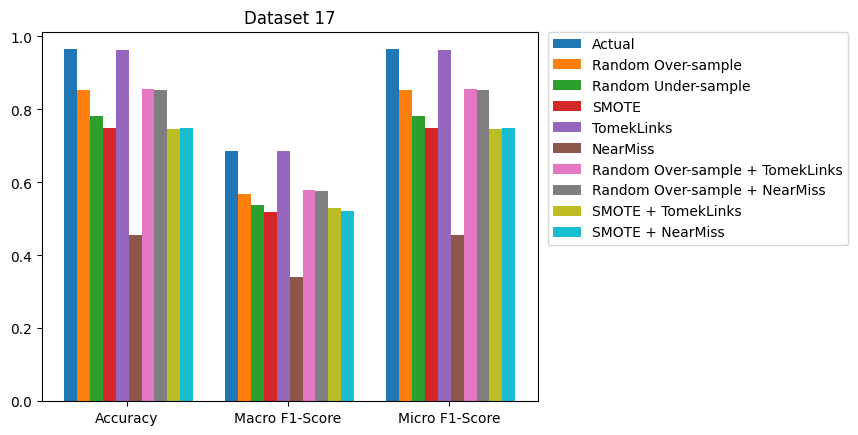

In [23]:
A1 = []
B1 = []
C1 = []
D1 = []
E1 = []
F1 = []
G1 = []
H1 = []
I1 = []
J1 = []
X = ['Accuracy','Macro F1-Score','Micro F1-Score']
X_axis = np.arange(len(X))
for i in range(3):
    k=0
    for j in range(i,len(A),3):
        k+=(A[j]/5)
    A1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(B),3):
        k+=(B[j]/5)
    B1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(C),3):
        k+=(C[j]/5)
    C1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(D),3):
        k+=(D[j]/5)
    D1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(E),3):
        k+=(E[j]/5)
    E1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(F),3):
        k+=(F[j]/5)
    F1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(G),3):
        k+=(G[j]/5)
    G1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(H),3):
        k+=(H[j]/5)
    H1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(I),3):
        k+=(I[j]/5)
    I1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(J),3):
        k+=(J[j]/5)
    J1+=[k]
     
plt.bar(X_axis, A1, 0.08, label = 'Actual')
plt.bar(X_axis+0.08 , B1, 0.08, label = 'Random Over-sample')
plt.bar(X_axis + 0.16, C1, 0.08, label = 'Random Under-sample')
plt.bar(X_axis + 0.24, D1, 0.08, label = 'SMOTE')
plt.bar(X_axis+0.32, E1, 0.08, label = 'TomekLinks')
plt.bar(X_axis+0.40 , F1, 0.08, label = 'NearMiss')
plt.bar(X_axis + 0.48, G1, 0.08, label = 'Random Over-sample + TomekLinks')
plt.bar(X_axis + 0.56, H1, 0.08, label = 'Random Over-sample + NearMiss')
plt.bar(X_axis + 0.64, I1, 0.08, label = 'SMOTE + TomekLinks')
plt.bar(X_axis + 0.72, J1, 0.08, label = 'SMOTE + NearMiss')

plt.xticks(X_axis+0.35, X)
plt.title("Dataset 17")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()